## CODE TO DETECT LINES IN IMAGE 
  

In [5]:
import cv2
from google.colab.patches import cv2_imshow
import numpy as np
import matplotlib.pyplot as plt


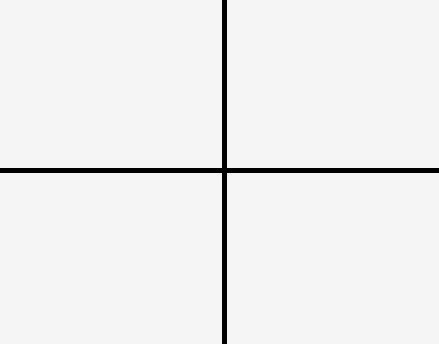

In [6]:
image_c = cv2.imread('/content/drive/MyDrive/Colab Notebooks/section 5 - Computer Vision/horizontal_vertical.jpg')
# image_c = cv2.imread('calendar.jpg')

# cv2.imshow('Given Image', image_c)
cv2_imshow(image_c)
cv2.waitKey(0)
cv2.destroyAllWindows()

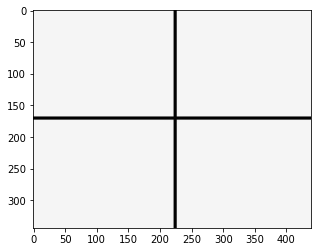

In [7]:
plt.imshow(image_c)

In [8]:

image_g = cv2.cvtColor(image_c, cv2.COLOR_BGR2GRAY)
image_canny = cv2.Canny(image_g, 50, 200, apertureSize = 3)
image_canny

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

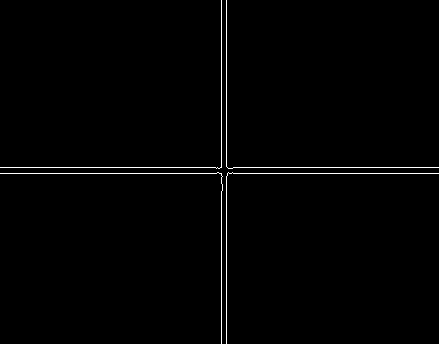

In [10]:
# cv2.imshow('canny image', image_canny)
cv2_imshow(image_canny)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [11]:

# rho accuracy of 1 pixel and theta accuracy of np.pi / 180 (1 degree)
# threshold is number of points on line
# Try 300, 400 and 500
lines = cv2.HoughLines(image_canny, 1, np.pi/180, 300)


In [12]:
lines
# Note that 1.57 rad is 89.95437
# Note that rho was the distance from the origin

array([[[173.       ,   1.5707964]],

       [[167.       ,   1.5707964]],

       [[226.       ,   0.       ]],

       [[221.       ,   0.       ]]], dtype=float32)

In [13]:
len(lines)

4

In [14]:
lines.shape

(4, 1, 2)

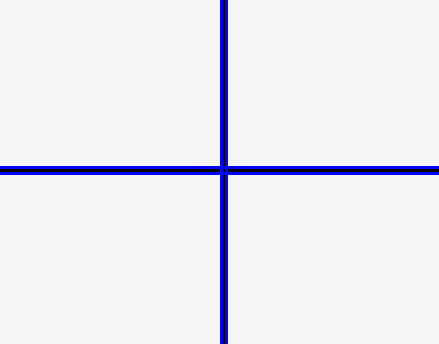

In [15]:
 if lines is not None:
        for i in range(0, len(lines)):
            rho = lines[i][0][0]
            theta = lines[i][0][1]
            
            x0 = rho * np.cos(theta)
            y0 = rho * np.sin(theta)
            
            a = np.cos(theta)
            b = np.sin(theta)
           
            x1 = int(x0 + 1000 * (-b))
            y1 = int(y0 + 1000 * (a))
            x2 = int(x0 - 1000 * (-b))
            y2 = int(y0 - 1000 * (a))
            cv2.line(image_c, (x1, y1), (x2, y2), (255, 0, 0), 2)
            
# cv2.imshow('Hough Lines', image_c)
cv2_imshow(image_c)
cv2.waitKey(0)
cv2.destroyAllWindows()